In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx")
df_copy = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx")

In [68]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


# **A. Feature Engineering**

**Check for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value**

In [69]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Determine the frequency of distinct values in each feature set**

In [70]:
# Numerical features
numerical_features = ["PatientId","AppointmentID","ScheduledDay","AppointmentDay","Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
# Categorical features
categorical_features = ["Gender","Neighbourhood","No-show"]

# Printing frequency of distinct values in each feature set for numerical_features
#print( df['PatientId'].value_counts() )
#print( df['AppointmentID'].value_counts() )
#print( df['ScheduledDay'].value_counts() )
#print( df['AppointmentDay'].value_counts() )
#print( df['Age'].value_counts() )
#print( df['Scholarship'].value_counts() )
#print( df['Hipertension'].value_counts() )
#print( df['Diabetes'].value_counts() )
#print( df['Alcoholism'].value_counts() )
#print( df['Handcap'].value_counts() )
#print( df['SMS_received'].value_counts() )

for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Printing unique values in each categorical features
for a in categorical_features:
    print("------------------categorical_feature----------------------"+a+": ")
    #print(sorted(df[a].unique()))
    print(df[a].value_counts())

------------------numerical_feature----------------------PatientId: 
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64
------------------numerical_feature----------------------AppointmentID: 
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64
------------------numerical_feature----------------------ScheduledDay: 
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103549, dtype:

**functiona to plot all features within the dataset to visualize for outliers**

Text(0.5, 0, 'SMS_received ')

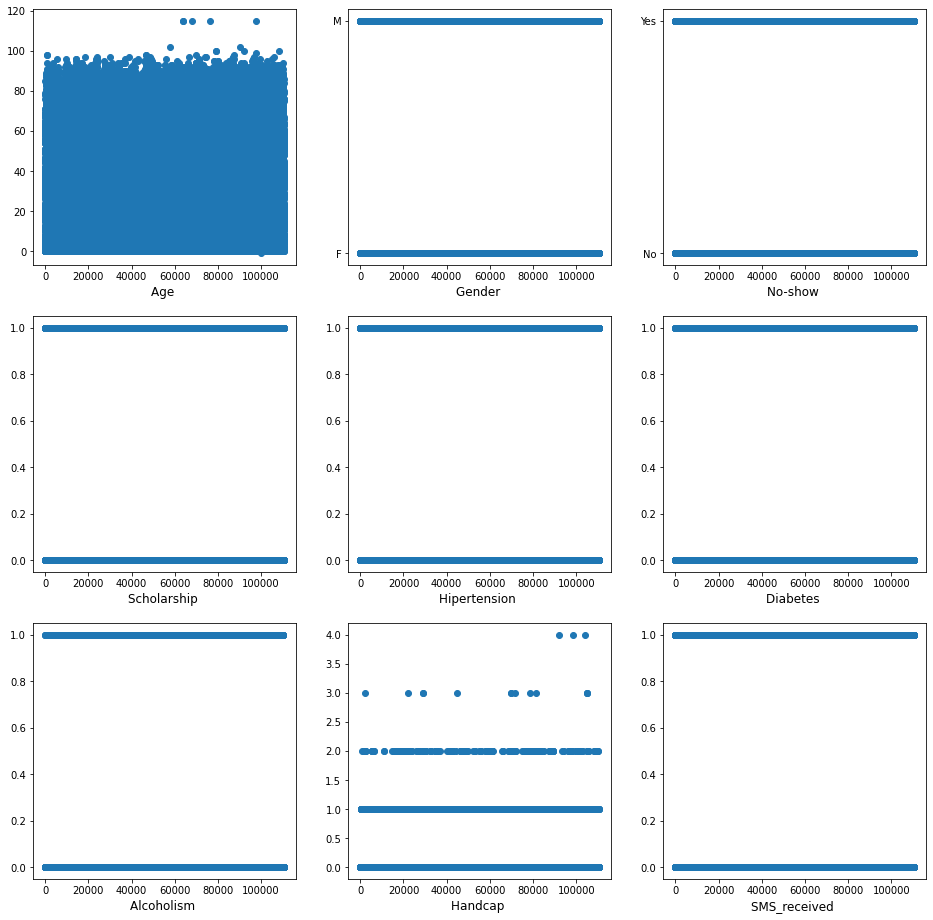

In [71]:
plt.rcParams['figure.figsize'] = (16, 16)
plt.subplot(3, 3, 1)
y=df['Age']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Age ', fontsize = 12)

plt.subplot(3, 3, 2)
y=df['Gender']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Gender ', fontsize = 12)

plt.subplot(3, 3, 3)
y=df['No-show']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('No-show ', fontsize = 12)

plt.subplot(3, 3, 4)
y=df['Scholarship']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Scholarship ', fontsize = 12)

plt.subplot(3, 3, 5)
y=df['Hipertension']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Hipertension ', fontsize = 12)

plt.subplot(3, 3, 6)
y=df['Diabetes']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Diabetes ', fontsize = 12)

plt.subplot(3, 3, 7)
y=df['Alcoholism']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Alcoholism ', fontsize = 12)

plt.subplot(3, 3, 8)
y=df['Handcap']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Handcap ', fontsize = 12)

plt.subplot(3, 3, 9)
y=df['SMS_received']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('SMS_received ', fontsize = 12)

Text(0.5, 0, 'Neighbourhood ')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


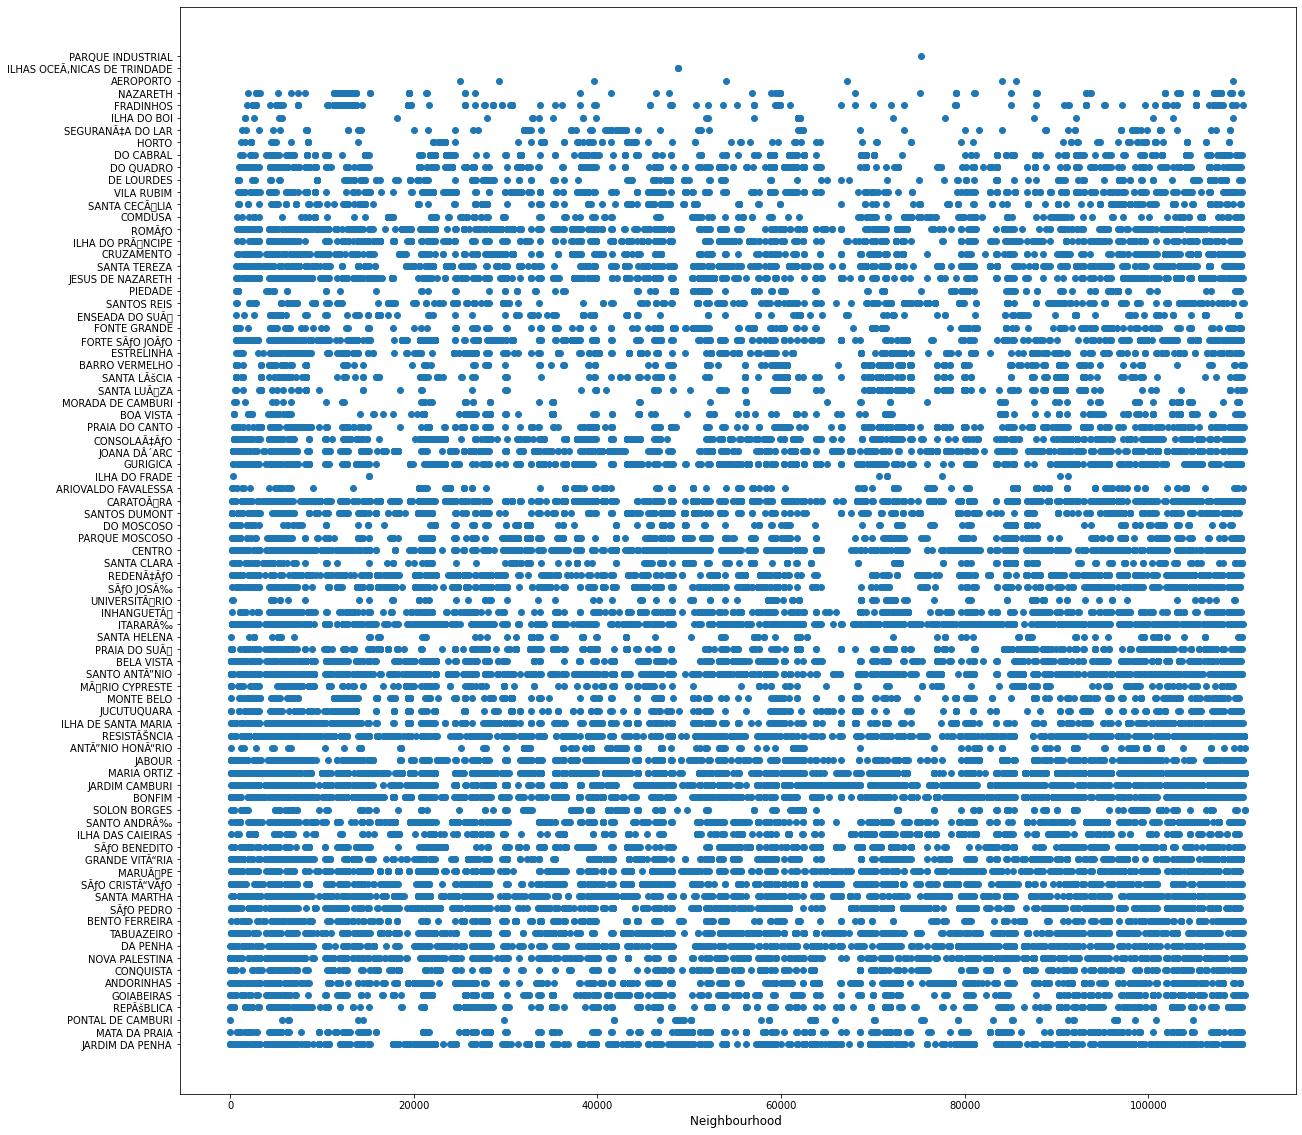

In [72]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(1, 1, 1)
y=df['Neighbourhood']
m=df.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y)
plt.xlabel('Neighbourhood ', fontsize = 12)

**Count the frequency of negative Age feature observations, and remove them**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
print("Before removing the negative age")
print( df['Age'].value_counts() )
# Get names of indexes for which column Age has value less than 0
a = df.index[df['Age'] < 0]
print (a)
df = df.drop(index=a)
print("After removing the negative age")
print( df['Age'].value_counts() )

Before removing the negative age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64
Int64Index([99832], dtype='int64')
After removing the negative age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


**The values within AwaitingTime are negative, transform them into positive values** NOT SURE ABOUT IS AS THERE IS NO COLUMN FOR AWAITINGTIME

**ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code**

In [76]:
df.dtypes
# Printing unique values in each categorical features
for a in categorical_features:
    print("------------------categorical_feature----------------------"+a+": ")
    print(sorted(df[a].unique()))
    print(df[a].value_counts())

d1 = {'AEROPORTO':1, 'ANDORINHAS':2, 'ANTÃ”NIO HONÃ“RIO':3, 'ARIOVALDO FAVALESSA':4, 'BARRO VERMELHO':5, 'BELA VISTA':6, 'BENTO FERREIRA':7, 'BOA VISTA':8, 'BONFIM':9, 'CARATOÃ\x8dRA':10, 'CENTRO':11, 'COMDUSA':12, 'CONQUISTA':13, 'CONSOLAÃ‡ÃƒO':14, 'CRUZAMENTO':15, 'DA PENHA':16, 'DE LOURDES':17, 'DO CABRAL':18, 'DO MOSCOSO':19, 'DO QUADRO':20, 'ENSEADA DO SUÃ\x81':21, 'ESTRELINHA':22, 'FONTE GRANDE':23, 'FORTE SÃƒO JOÃƒO':24, 'FRADINHOS':25, 'GOIABEIRAS':26, 'GRANDE VITÃ“RIA':27, 'GURIGICA':28, 'HORTO':29, 'ILHA DAS CAIEIRAS':30, 'ILHA DE SANTA MARIA':31, 'ILHA DO BOI':32, 'ILHA DO FRADE':33, 'ILHA DO PRÃ\x8dNCIPE':34, 'ILHAS OCEÃ‚NICAS DE TRINDADE':35, 'INHANGUETÃ\x81':36, 'ITARARÃ‰':37, 'JABOUR':38, 'JARDIM CAMBURI':39, 'JARDIM DA PENHA':40, 'JESUS DE NAZARETH':41, 'JOANA DÂ´ARC':42, 'JUCUTUQUARA':43, 'MARIA ORTIZ':44, 'MARUÃ\x8dPE':45, 'MATA DA PRAIA':46, 'MONTE BELO':47, 'MORADA DE CAMBURI':48, 'MÃ\x81RIO CYPRESTE':49, 'NAZARETH':50, 'NOVA PALESTINA':51, 'PARQUE INDUSTRIAL':52, 'PARQUE MOSCOSO':53, 'PIEDADE':54, 'PONTAL DE CAMBURI':55, 'PRAIA DO CANTO':56, 'PRAIA DO SUÃ\x81':57, 'REDENÃ‡ÃƒO':58, 'REPÃšBLICA':59, 'RESISTÃŠNCIA':60, 'ROMÃƒO':61, 'SANTA CECÃ\x8dLIA':62, 'SANTA CLARA':63, 'SANTA HELENA':64, 'SANTA LUÃ\x8dZA':65, 'SANTA LÃšCIA':66, 'SANTA MARTHA':67, 'SANTA TEREZA':68, 'SANTO ANDRÃ‰':69, 'SANTO ANTÃ”NIO':70, 'SANTOS DUMONT':71, 'SANTOS REIS':72, 'SEGURANÃ‡A DO LAR':73, 'SOLON BORGES':74, 'SÃƒO BENEDITO':75, 'SÃƒO CRISTÃ“VÃƒO':76, 'SÃƒO JOSÃ‰':77, 'SÃƒO PEDRO':78, 'TABUAZEIRO':79, 'UNIVERSITÃ\x81RIO':80, 'VILA RUBIM':81}   
df['Neighbourhood'] = df['Neighbourhood'].map(d1)

d2 = {'M':1, 'F':0} 
df['Gender'] = df['Gender'].map(d2)

d3 = {'No':0, 'Yes':1}
df['No-show'] = df['No-show'].map(d3)

------------------categorical_feature----------------------Gender: 
['F', 'M']
F    71839
M    38687
Name: Gender, dtype: int64
------------------categorical_feature----------------------Neighbourhood: 
['AEROPORTO', 'ANDORINHAS', 'ANTÃ”NIO HONÃ“RIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÃ\x8dRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÃ‡ÃƒO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÃ\x81', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃƒO JOÃƒO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÃ“RIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÃ\x8dNCIPE', 'ILHAS OCEÃ‚NICAS DE TRINDADE', 'INHANGUETÃ\x81', 'ITARARÃ‰', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA DÂ´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÃ\x8dPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÃ\x81RIO CYPRESTE', '

In [80]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,40,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,40,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,46,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,55,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,40,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,44,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,44,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,44,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,44,0,0,0,0,0,1,0


**Break the date features into date components**

**ML algorithms work best when the input data are scaled to a narrow range around zero. Rescale the age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score standardization) function.**

**Conduct variability comparison between features using a correlation matrix & drop correlated features**